<a href="https://colab.research.google.com/github/FredLongo/MLDL_Project/blob/main/Insomnia_LoadStocksFromFileipynb%20NK%204_22_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Insomnia - Stock Prediction

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA       #ARIMA model
import matplotlib.pyplot as plt                     # ploting Graphs
from statsmodels.graphics.tsaplots import plot_acf  # ploting more Graphs
from pmdarima.arima.utils import ndiffs             # for ndiffs evaluation
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs



In [4]:
import statsmodels.tsa

##Import Data from Files

In [61]:
#declare filenames
adm_file_path = '/content/drive/MyDrive/adm.us.txt'
#msi_file_path = 'msi.us.txt'
#xom_file_path = 'xom.us.txt'

#load files
adm_df = pd.read_csv(adm_file_path)
#msi_df = pd.read_csv(msi_file_path)
#xom_df = pd.read_csv(xom_file_path)


# Create index of date column
adm_df['Date'] = pd.to_datetime(adm_df['Date'])
adm_df.set_index('Date', inplace=True)

#msi_df['Date'] = pd.to_datetime(msi_df['Date'])
#msi_df.set_index('Date', inplace=True)

#xom_df['Date'] = pd.to_datetime(xom_df['Date'])
#xom_df.set_index('Date', inplace=True)


#Just the date and Closeing Column
adm_closing_prices = adm_df['Close'][0:len(adm_df['Close'])-10]
admTest = adm_df['Close'][len(adm_df['Close'])-10:len(adm_df['Close'])]
#msi_closing_prices = msi_df['Close']
#xom_closing_prices = xom_df['Close']

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Normilize the Data

Notes: Review video for process understanding  https://www.youtube.com/watch?v=gqryqIlvEoM

In [62]:
#Check to see if it needs to be made stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(adm_closing_prices.dropna())
print(f"ADF statistic : {result[0]}")
print(f"p-value: {result[1]}")



ADF statistic : -0.6588640082362208
p-value: 0.8571189745777148


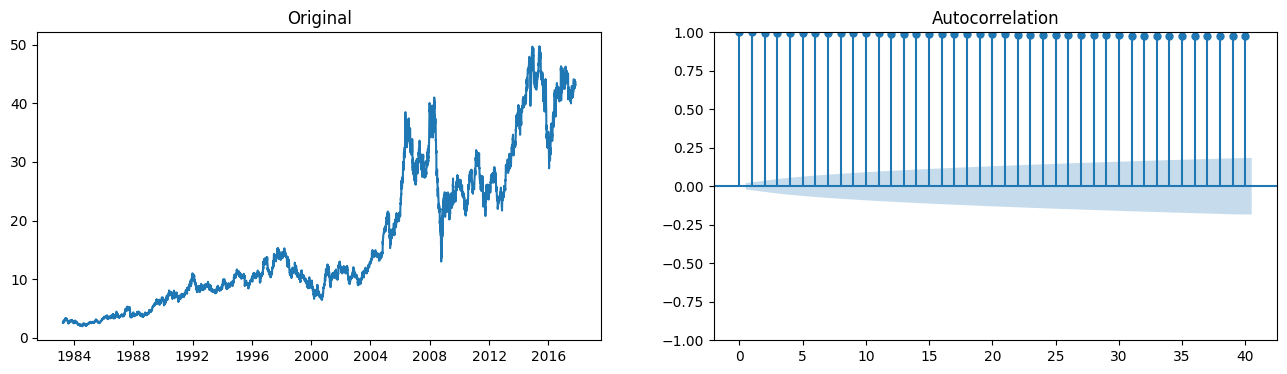

In [63]:
# Corrolation between serias and its lags
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(adm_closing_prices)
ax1.set_title("Original")
plot_acf(adm_closing_prices, ax=ax2);

In [64]:

# To standerdize the differential we need to know how many need to be taken.
#Used to see how many differentials should be taken
diff_num = ndiffs(adm_closing_prices, test="adf")
print(f"Number of Diffrening to run in :{diff_num}")


def x_diffs(df_: pd.DataFrame, x: int) -> pd.DataFrame:
    if x == 0:
        return df_
    else:
        return x_diffs(df_.diff().dropna(), x - 1)




Number of Diffrening to run in :1


(0.0, 1.0)

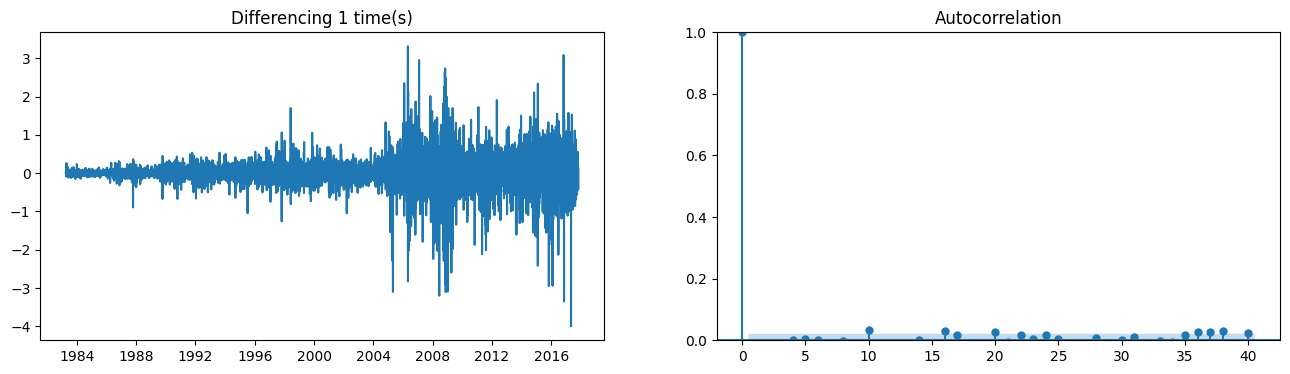

In [84]:
diff_x = x_diffs(adm_closing_prices,1)
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff_x)
ax1.set_title(f"Differencing {diff_num} time(s)")
plot_acf(diff_x, ax=ax2);
ax2.set_ylim(0,1)

In [66]:
#Check to see if it needs to be made stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_x.dropna())
print(f"ADF statistic : {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic : -14.134265997472111
p-value: 2.3048153731563996e-26


In [67]:
from statsmodels.graphics.tsaplots import plot_pacf # parcial graphs


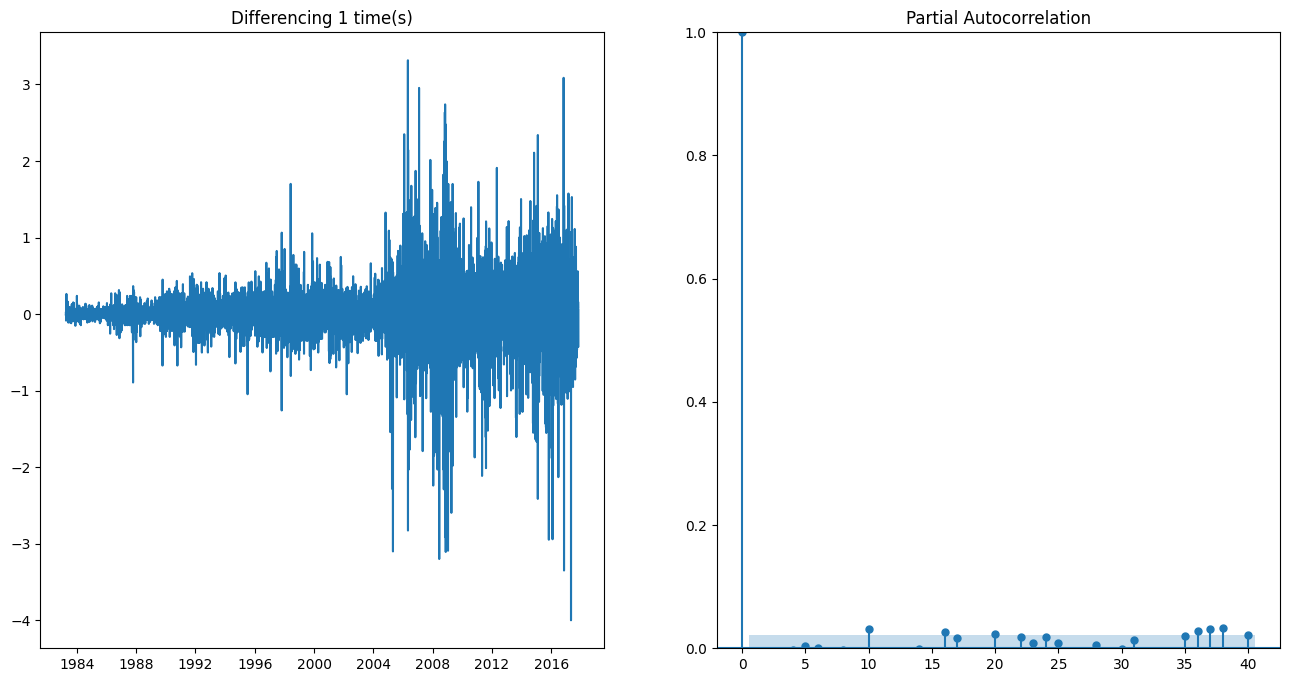

In [68]:
#partial Diffrencing
#import statsmodels
pdiff = adm_closing_prices.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.plot(pdiff)
ax1.set_title(f"Differencing {diff_num} time(s)")

plot_pacf(pdiff, ax=ax2)
ax2.set_ylim(0, 1)  # Set the y-axis limits explicitly for ax2
plt.show()

#-------------------------------------------------------------------------------
#  Mapes are not comming out correctly.
#  They look like the ones from 'plot_acf()' but should be 'plot_pacf()'
#-------------------------------------------------------------------------------

In [69]:
#Check to see if it needs to be made stationary

from statsmodels.tsa.stattools import adfuller
result = adfuller(pdiff.dropna())
print(f"ADF statistic : {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic : -14.134265997472111
p-value: 2.3048153731563996e-26


## Build Model

In [70]:
!pip install statsmodels

In [71]:
from statsmodels.tsa.arima.model import ARIMA

In [99]:
# Fit the ARIMA model
# The parameters for ARIMA are (p, d, q)
# p: periods taken for autoregressive model
      # lag observations

# d: Integrated order, difference
      #
# q: periods in moving average model

model = ARIMA(diff_x, order=(2, 1, 2))  # Example parameters


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [100]:
result = model.fit()


In [101]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8715
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3757.010
Date:                Mon, 22 Apr 2024   AIC                           7524.019
Time:                        20:06:55   BIC                           7559.383
Sample:                             0   HQIC                          7536.072
                               - 8715                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0025      0.026    -39.197      0.000      -1.053      -0.952
ar.L2         -0.0307      0.006     -5.092      0.000      -0.043      -0.019
ma.L1         -0.0333      0.025     -1.316      0.1

(array([3.11732685e-04, 1.40279708e-03, 2.64972782e-03, 1.44955699e-02,
        1.10041638e-01, 1.12597846e+00, 9.18052758e-02, 9.50784690e-03,
        1.40279708e-03, 7.79331713e-04]),
 array([-4.00656764, -3.270394  , -2.53422036, -1.79804672, -1.06187307,
        -0.32569943,  0.41047421,  1.14664785,  1.88282149,  2.61899513,
         3.35516878]),
 <BarContainer object of 10 artists>)

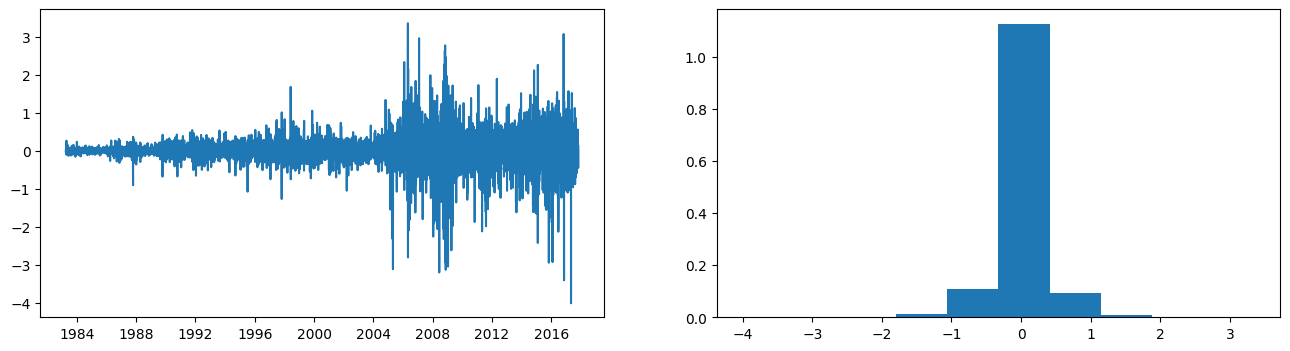

In [102]:
# plot  residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=1)




In [103]:
# Actual vs Fitted
#result.plot_predict(start = 1, end=60, dynamic=False,)
print(result.forecast(10))
print(admTest)


8715    0.001762
8716    0.007436
8717    0.003536
8718    0.007271
8719    0.003646
8720    0.007165
8721    0.003749
8722    0.007066
8723    0.003845
8724    0.006972
Name: predicted_mean, dtype: float64
Date
2017-10-30    42.81
2017-10-31    40.87
2017-11-01    40.62
2017-11-02    40.16
2017-11-03    39.78
2017-11-06    39.27
2017-11-07    39.54
2017-11-08    39.80
2017-11-09    39.60
2017-11-10    39.93
Name: Close, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [104]:
i=1
z = [0]*(len(adm_closing_prices)-1)
while i < len(adm_closing_prices):
  z[i-1]=adm_closing_prices[i]-adm_closing_prices[i-1]
  i=i+1
print(z)

[0.016799999999999926, -0.016799999999999926, 0.0, -0.008799999999999919, -0.0849000000000002, 0.016999999999999904, -0.016999999999999904, 0.0, 0.016999999999999904, 0.05109999999999992, 0.2636000000000003, 0.0766, -0.0766, 0.0596000000000001, -0.008600000000000385, 0.0, -0.034199999999999786, -0.04220000000000024, 0.0, 0.0, -0.05109999999999992, 0.017000000000000348, -0.017000000000000348, 0.0849000000000002, 0.0, 0.0935999999999999, 0.04260000000000019, 0.016899999999999693, -0.03390000000000004, -0.008599999999999941, 0.0, -0.034199999999999786, 0.017199999999999882, 0.016999999999999904, 0.04249999999999998, 0.16170000000000018, 0.04239999999999977, 0.0, 0.05110000000000037, 0.05959999999999965, -0.07640000000000002, -0.017199999999999882, 0.017199999999999882, -0.1109, 0.0, 0.017200000000000326, 0.025599999999999845, 0.016999999999999904, -0.04259999999999975, -0.05109999999999992, 0.0, 0.0338999999999996, 0.0766, 0.0343, -0.017199999999999882, 0.0, 0.03400000000000025, -0.067900